## Load the sector package

In [1]:
from sector import SECTOR

## Initialise a SECTOR model

SECTOR is label-free. Enabling `eval_mode` (`eval_mode=1`) only reports per-epoch evaluation metrics; it does not introduce label usage during training.

In [2]:
m = SECTOR(
    dataset_path='./data',    # The path for the spatial transcriptomics (ST) datasets.
    dataset='DLPFC',          # The DLPFC (10x Visium) dataset.
    slice='151673',           # A single ST slice of the DLPFC dataset.
    num_clusters=7,           # The number of expected clusters.
    eval_mode=1               # Turn on evaluation mode.
)

Device: cuda:0
Dataset Name: DLPFC
Number of nodes: 3611
Number of edges: 12889
Number of features: 20
Number of classes: 7 (labels loaded: True)
Feature: torch.Size([3611, 20])
edge_index: torch.Size([2, 25779])


## Train the SECTOR model

In [3]:
m.fit(
    lambda_tv=2.0,            # TV regularizer coefficient
    stability_nmi_thr=0.97,   # Early stopping criterion (label-free)
    gamma_balance=1.0,        # [Optional] Balance regularizer coefficient
)

[Probe] Starting 20 epochs with balance OFF...
[Probe] Epoch 0 | Loss=9.448453 | UsedK=6/7
[Probe] Epoch 19 | Loss=9.199598 | UsedK=5/7
[Restart] Not stably at K by end of probe (stable_hits=0/2). Restarting with gamma_balance=1.0.
Epoch: 0 [0.040s], Loss: 9.504453, NMI: 0.442709, HOM: 0.373524, COM: 0.543349, K: 6/7, 
Epoch: 1 [0.034s], Loss: 9.486593, NMI: 0.443874, HOM: 0.385537, COM: 0.523013, K: 6/7, 
Epoch: 2 [0.034s], Loss: 9.470894, NMI: 0.442144, HOM: 0.393906, COM: 0.503847, K: 6/7, 
Epoch: 3 [0.034s], Loss: 9.453794, NMI: 0.436132, HOM: 0.397516, COM: 0.483059, K: 6/7, 
Epoch: 4 [0.034s], Loss: 9.440426, NMI: 0.442634, HOM: 0.408586, COM: 0.482874, K: 6/7, 
Epoch: 5 [0.033s], Loss: 9.428242, NMI: 0.442562, HOM: 0.412525, COM: 0.477318, K: 6/7, 
Epoch: 6 [0.033s], Loss: 9.417425, NMI: 0.448375, HOM: 0.419753, COM: 0.481185, K: 6/7, 
Epoch: 7 [0.033s], Loss: 9.406250, NMI: 0.457502, HOM: 0.428740, COM: 0.490402, K: 6/7, 
Epoch: 8 [0.033s], Loss: 9.397006, NMI: 0.462163, HOM: 0

## Infer and visualise spatial domains and pseudotime

[Post hoc] Island cleaner changed 55 spots (min_abs=40, min_frac=0.1, max_iter=2)
[Post hoc] After island removal => NMI=0.712603, HOM=0.732775, COM=0.693512, ARI=0.578098, AMI=0.711829 (K=7/7)


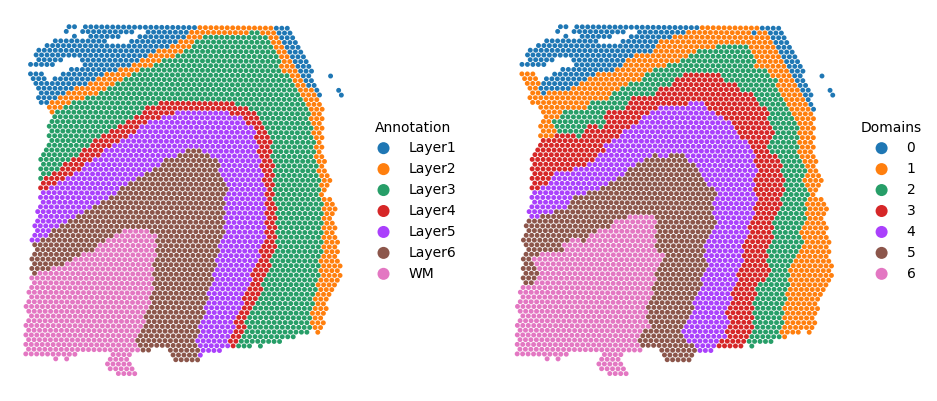

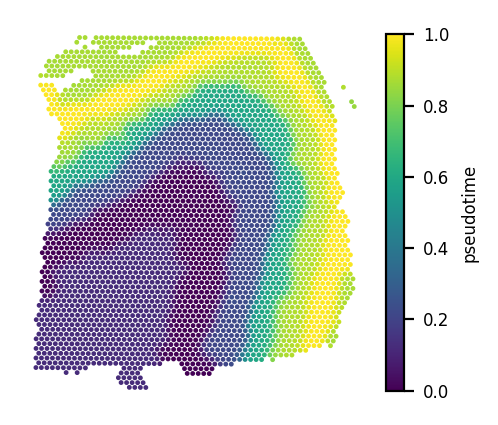

In [4]:
adata = m.pred(
    spatial_anchor='south',    # Spatial oritentation of pseudotime; can also use root_cluster to specify a desired starting point.
    plot=True,                 # If true, spatial domains and pseudotime are plotted and saved.
    island_min_frac = 0.1,     # [Optional] Minimum component size for post hoc refinement of clustering results.
    island_min_abs = 40,       # [Optional] Absolute minimum component size for post hoc refinement of clustering results.
)

## Evaluation metrics

In [5]:
print('NMI:', adata.uns['SECTOR']['final_metrics']['NMI'])
print('HOM:', adata.uns['SECTOR']['final_metrics']['HOM'])
print('COM:', adata.uns['SECTOR']['final_metrics']['COM'])

NMI: 0.7126033695712675
HOM: 0.7327754209604006
COM: 0.6935121682339342
